## Corner Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

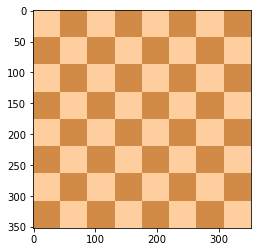

In [2]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

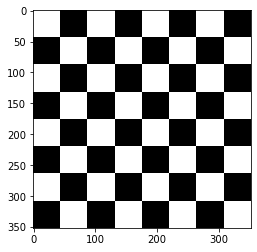

In [3]:
gray_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_chess, 'gray')

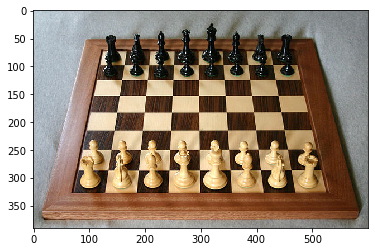

In [4]:
real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

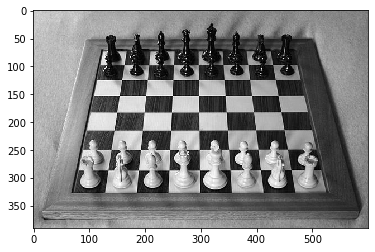

In [5]:
gray_real = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_real, cmap = 'gray')

### 1. Harris Corner Detection

1230700.1
-157529.61


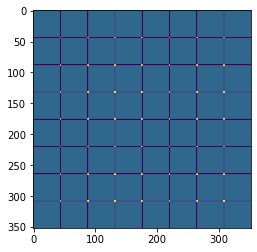

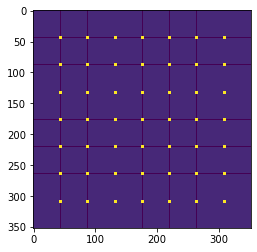

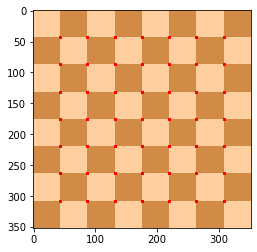

In [6]:
gray_flat = np.float32(gray_chess)
dst = cv2.cornerHarris(src = gray_flat, blockSize = 2, ksize = 3, k = 0.04)
plt.figure(0)
plt.imshow(dst)
dst_cpy = cv2.dilate(dst, None)
plt.figure(1)
plt.imshow(dst_cpy)
print(dst_cpy.max())
print(dst_cpy.min())
flat_chess[dst_cpy > 0.01*dst_cpy.max()] = [255, 0, 0]
plt.figure(2)
plt.imshow(flat_chess)

390


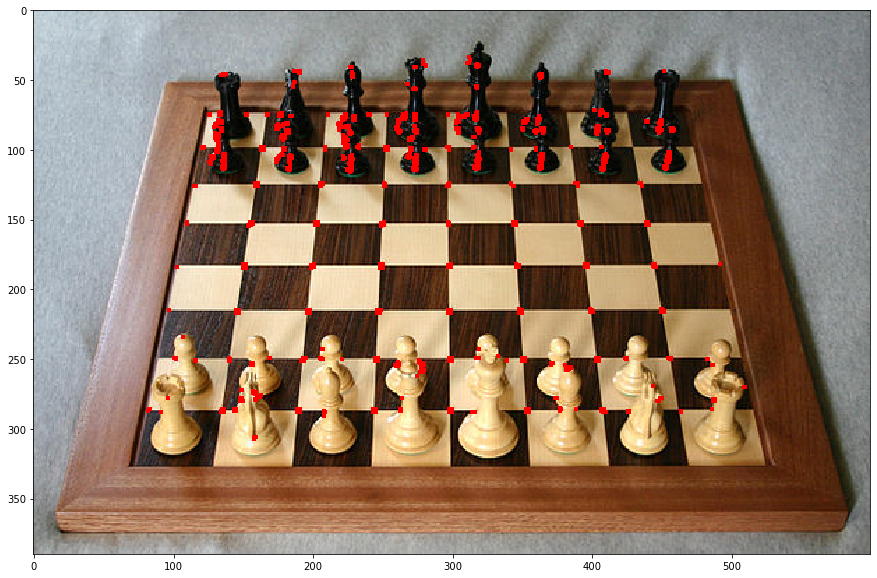

In [28]:
gray_real_corner = np.float32(gray_real)

dst = cv2.cornerHarris(src = gray_real_corner, blockSize = 2, ksize = 3, k = 0.04)
dst = cv2.dilate(dst, None)

real_chess_corner = real_chess.copy()

real_chess_corner[dst > 0.05 * dst.max()] = [255, 0, 0]

print(dst.shape[0])    

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
ax.imshow(real_chess_corner)

### 2. Shi Tomasi Corner Detector

In [54]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

gray_flat = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
gary_real = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)

In [55]:
gray_flat_cpy = gray_flat.copy()

# max corners - give all the corners for a negative number
corners = cv2.goodFeaturesToTrack(gray_flat, maxCorners = 5, qualityLevel = 0.01, minDistance = 10)

#### 2. a. Marking the corners

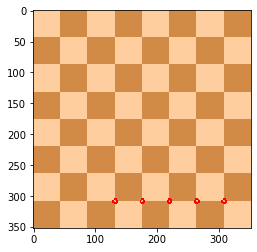

In [56]:
flat_chess_cpy = flat_chess.copy()

corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess_cpy, (x,y), 3, (255, 0, 0), 2)
plt.imshow(flat_chess_cpy)

#### 2. b. Detecting all corners

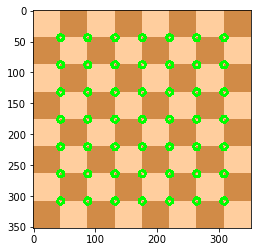

In [58]:
gray_flat_cpy = gray_flat.copy()
flat_chess_cpy = flat_chess.copy()
corners = cv2.goodFeaturesToTrack(gray_flat_cpy, 64, qualityLevel = 0.01, minDistance = 10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess_cpy, (x,y), 5, (0, 255, 0), 3)
plt.imshow(flat_chess_cpy)

#### 2. c. Detecting all corners on real chess

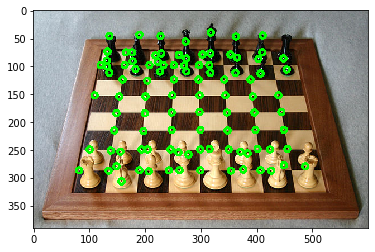

In [60]:
gray_real_cpy = gray_real.copy()
real_chess_cpy = real_chess.copy()

NUMBER_OF_CORNERS = 100

corners = cv2.goodFeaturesToTrack(gray_real_cpy, NUMBER_OF_CORNERS, 0.01, 10)
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess_cpy, (x,y), 5, (0,255,0), 3)

plt.imshow(real_chess_cpy)